In [248]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [53]:
df = pd.read_csv('./chatgpt1.csv')

In [54]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [55]:
df.tail()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
49996,2023-01-24 06:57:56+00:00,1617778712082096128,"#ChatGPT ist ein #Chatbot, der durch künstlich...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1617778712082096128,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
49997,2023-01-24 06:57:59+00:00,1617778726393249792,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1617774521586708480,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
49998,2023-01-24 06:58:00+00:00,1617778728481992705,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1617778728481992705,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1
49999,2023-01-24 06:58:01+00:00,1617778731678044162,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1617778731678044162,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0
50000,2023-01-24 06:58:01+00:00,1617778733355790342,Ahora sueño con el día en que Amazon integre u...,AmericoSD_69,https://twitter.com/AmericoSD_69/status/161777...,https://twitter.com/AmericoSD_69,NaN,NaN,0,0,0,0,1617778733355790342,es,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,[],0


In [56]:
df.shape

(50001, 20)

In [57]:
# A summary of the overall dataset
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    return summary

summary(df)

,index,dtypes,missing,Uniques
0,Datetime,object,0,41559
1,Tweet Id,int64,0,50001
2,Text,object,0,49555
3,Username,object,0,38433
4,Permalink,object,0,50001
5,User,object,0,38433
6,Outlinks,object,30059,13769
7,CountLinks,object,30059,19485
8,ReplyCount,int64,0,108
9,RetweetCount,int64,0,138


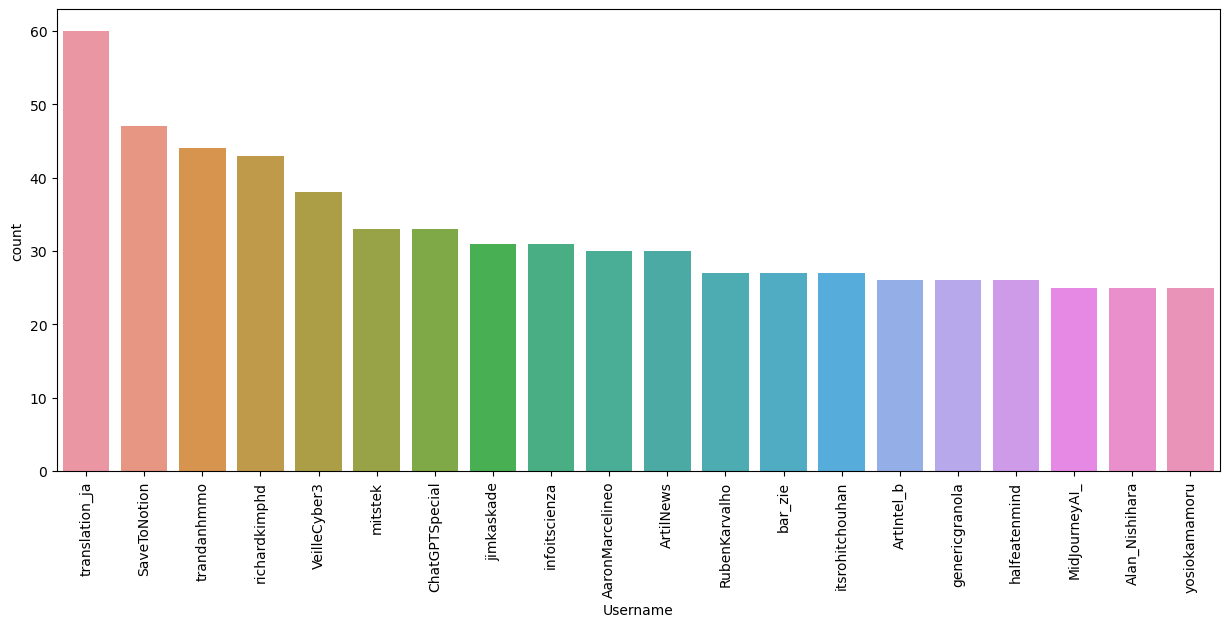

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Username', order=df["Username"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

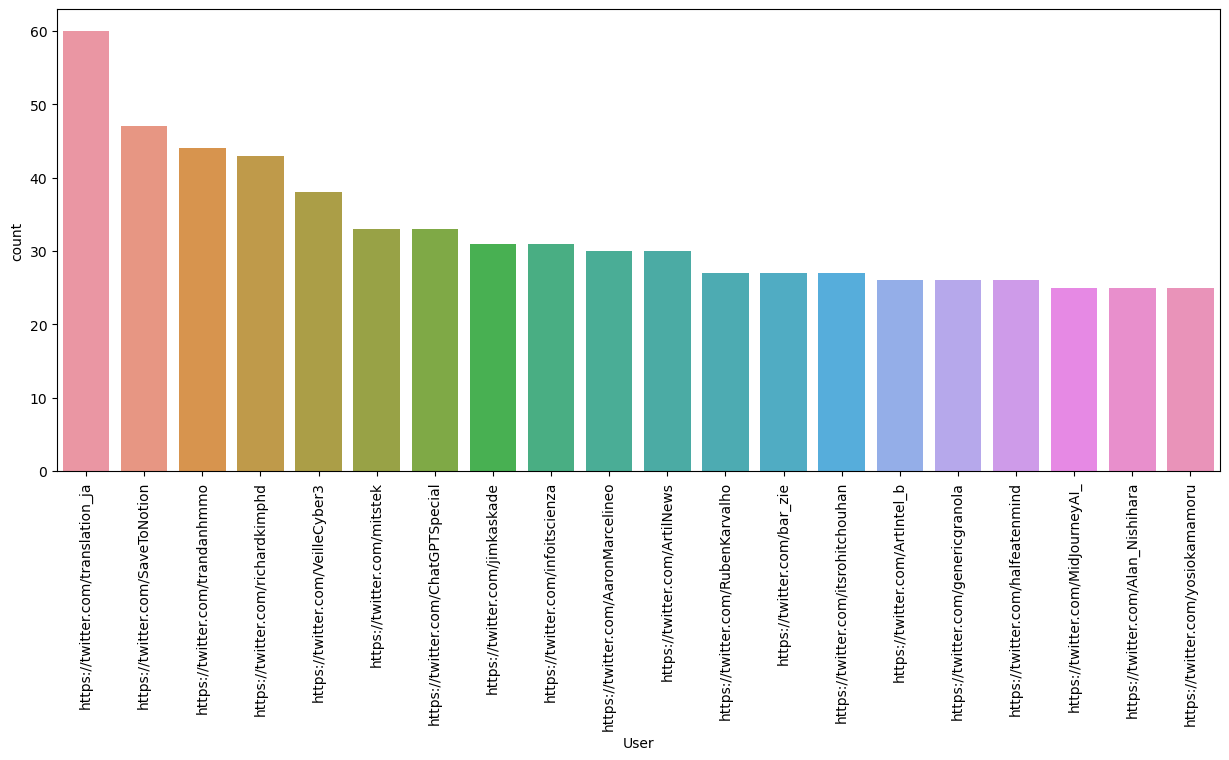

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='User', order=df["User"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

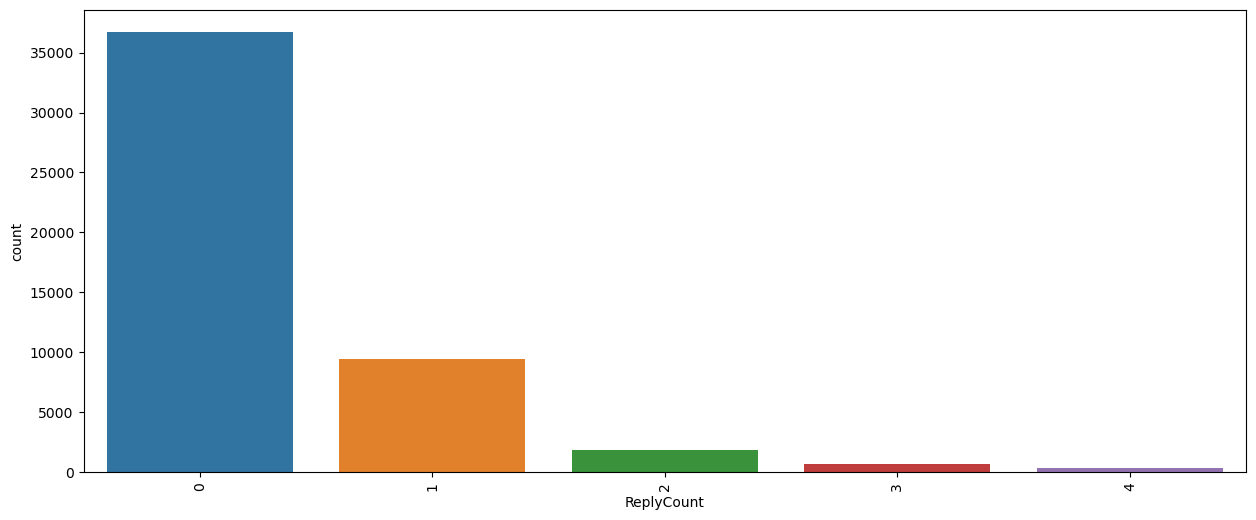

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='ReplyCount', order=df["ReplyCount"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

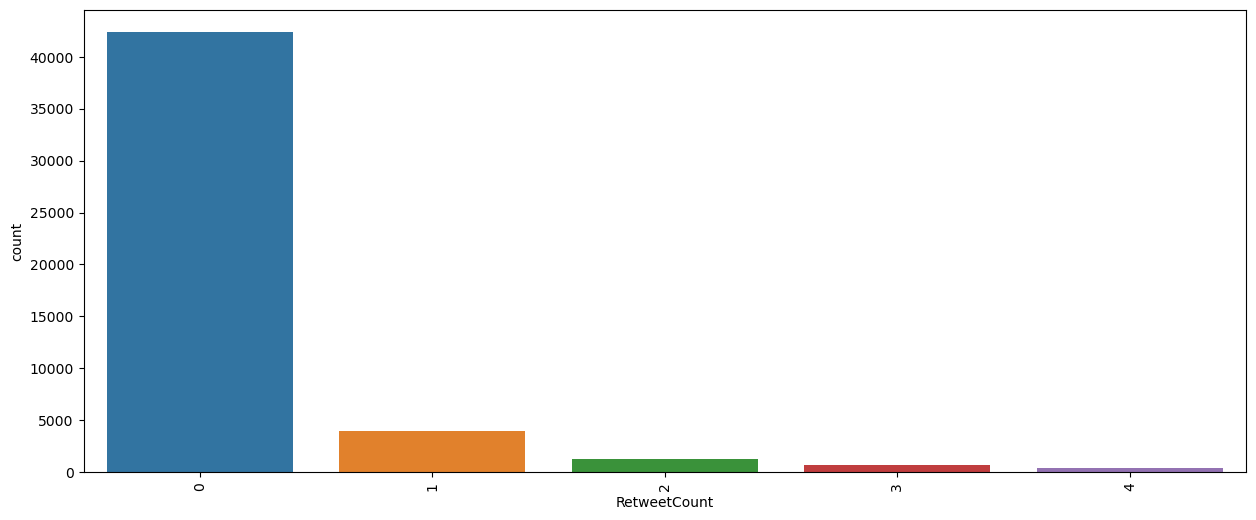

In [61]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='RetweetCount', order=df["RetweetCount"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

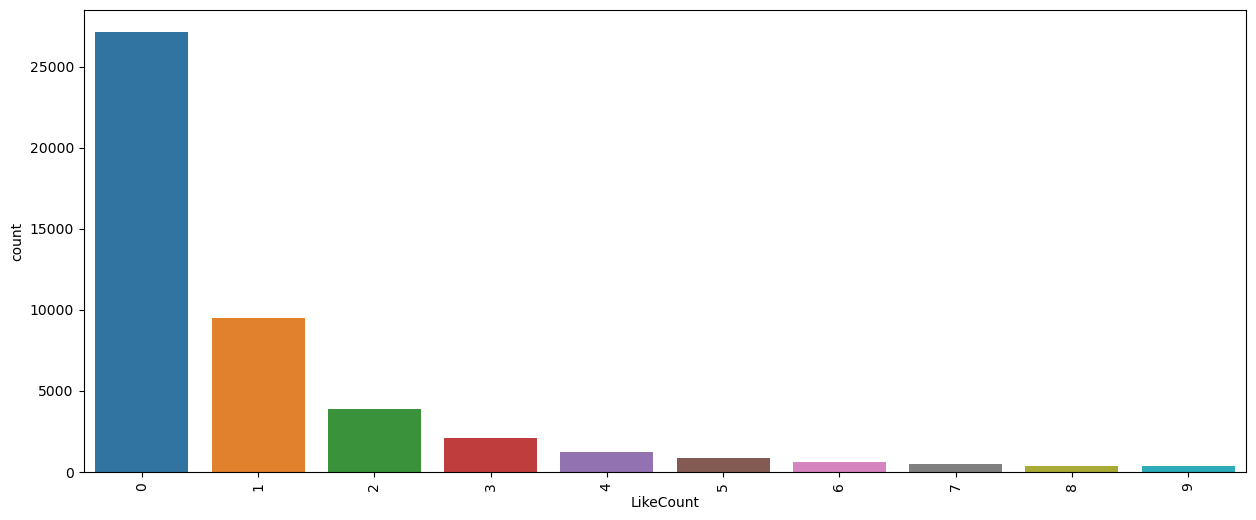

In [62]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='LikeCount', order=df["LikeCount"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

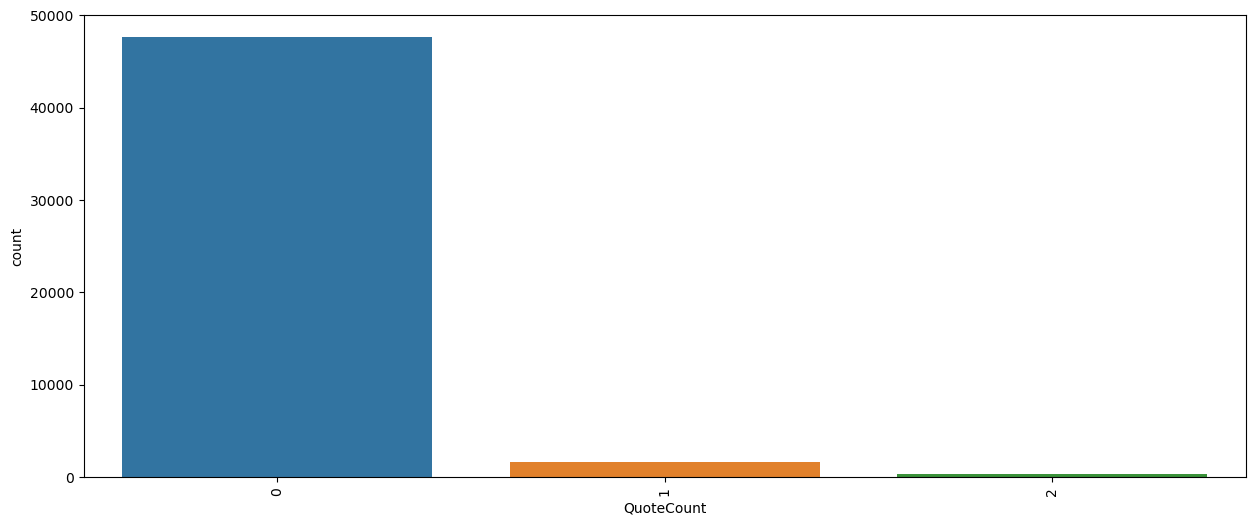

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='QuoteCount', order=df["QuoteCount"].value_counts().index[:3])
plt.xticks(rotation=90)
plt.show()

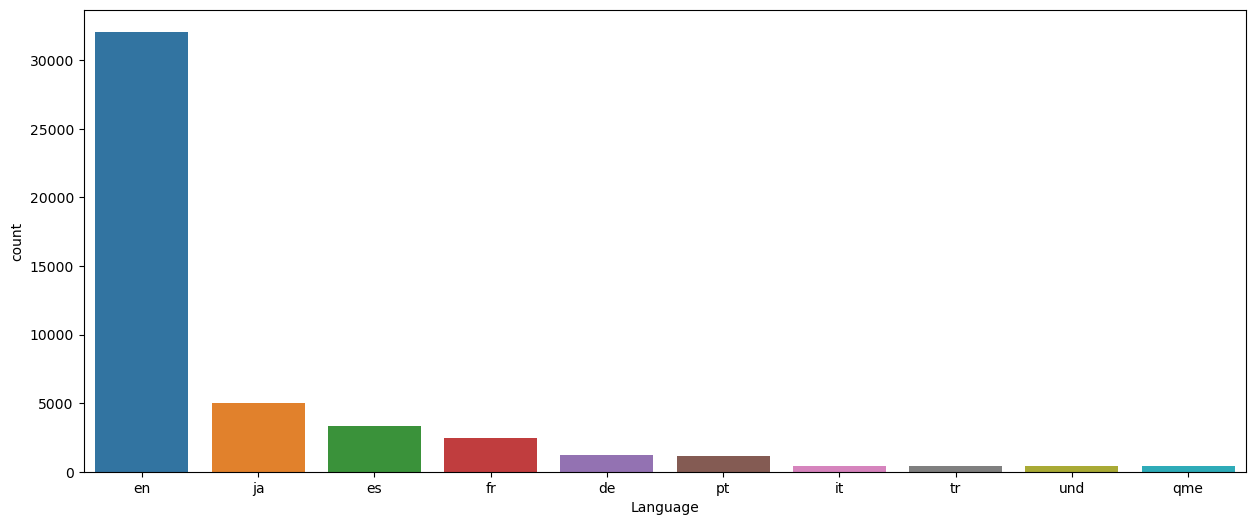

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.show()

In [65]:
df['Source'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 17814
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      12281
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>     8972
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>                                     1383
<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>                                  959
                                                                                        ...  
<a href="https://www.oliberal.com/" rel="nofollow">bot_twitter_oliberal</a>                 1
<a href="http://www.google.com" rel="nofollow">hogeeee</a>                                  1
<a href="https://google.com" rel="nofollow">bdtw</a>                                        1
<a href="https://euwatch.live" rel="nofollow">EUwatch</a>                                   1
<a href="http://twmode.sf.net/" rel="nofollow">twmode</a>   

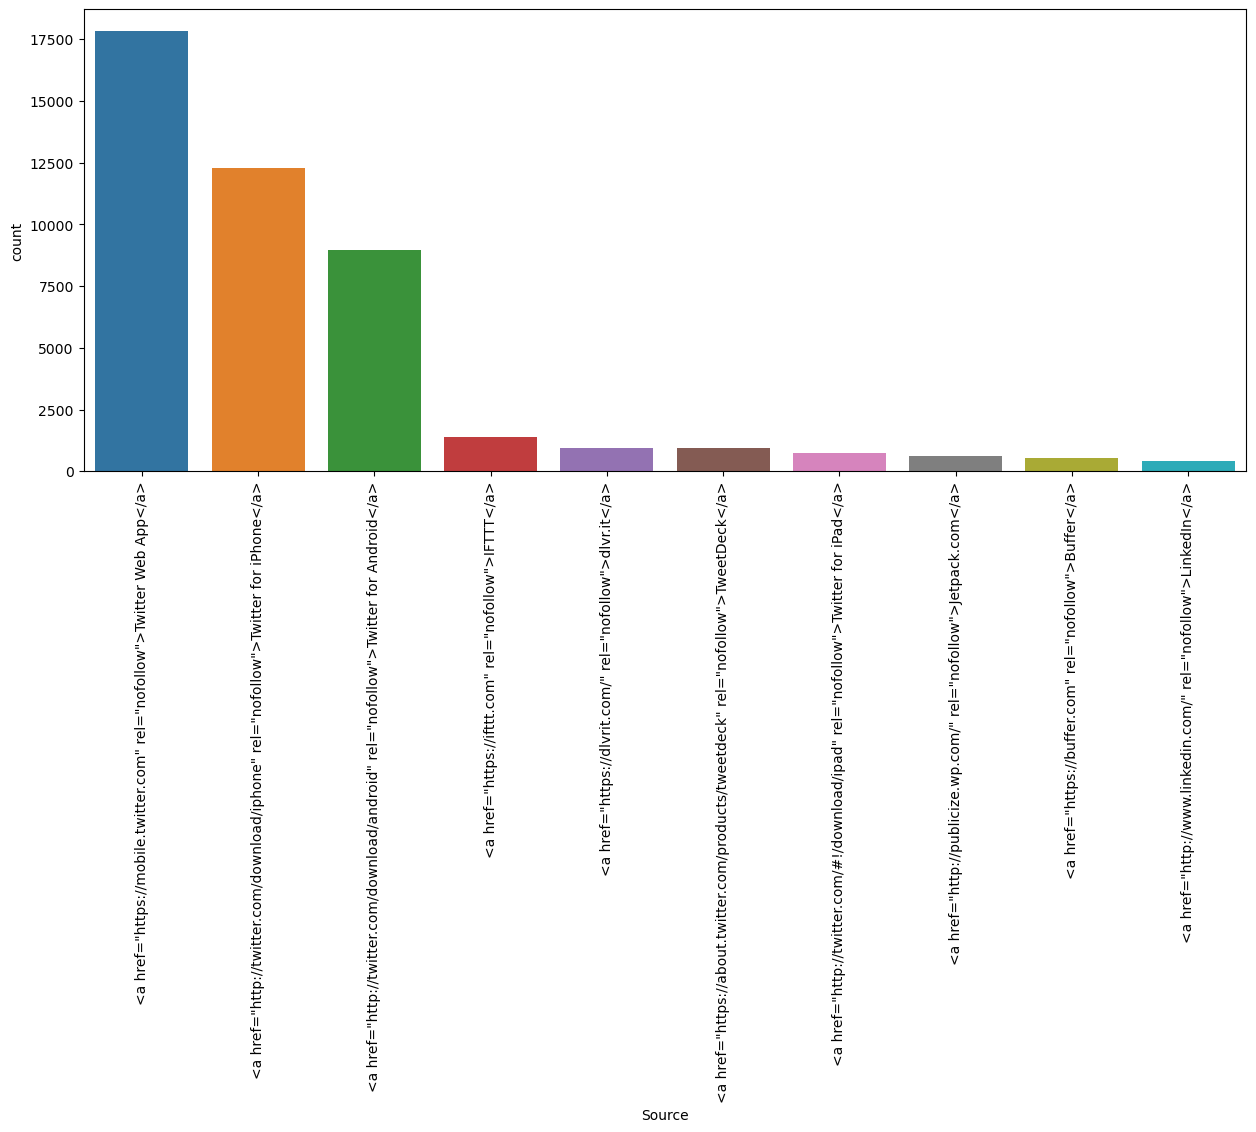

In [66]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Source', order=df["Source"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

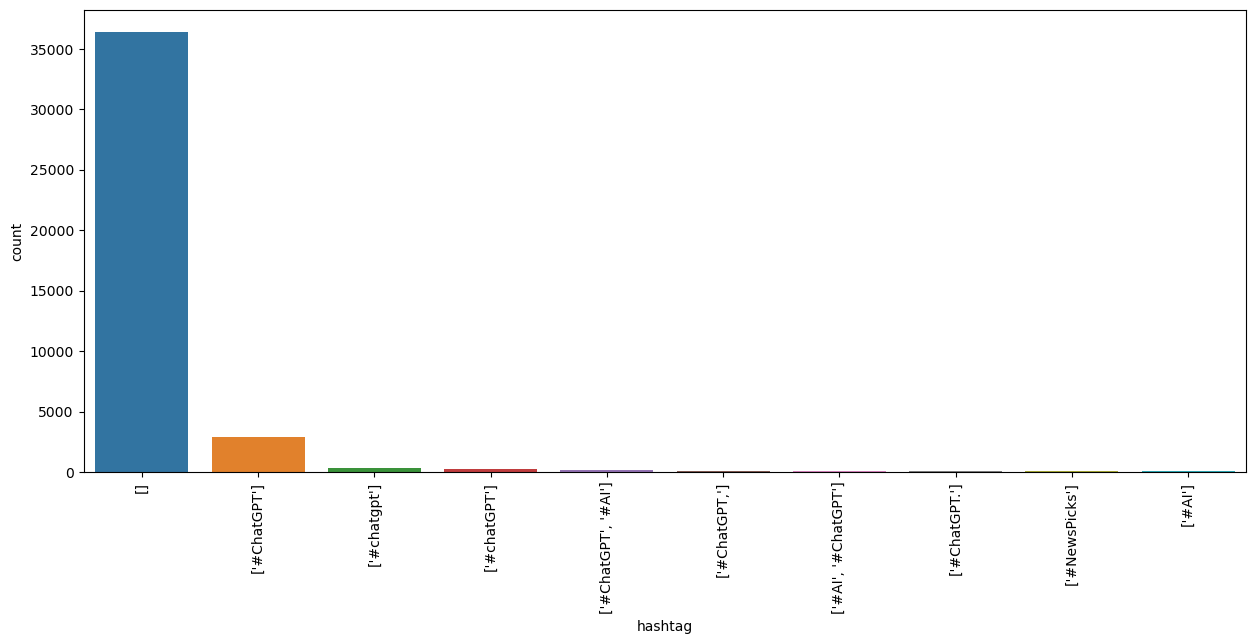

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hashtag', order=df["hashtag"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

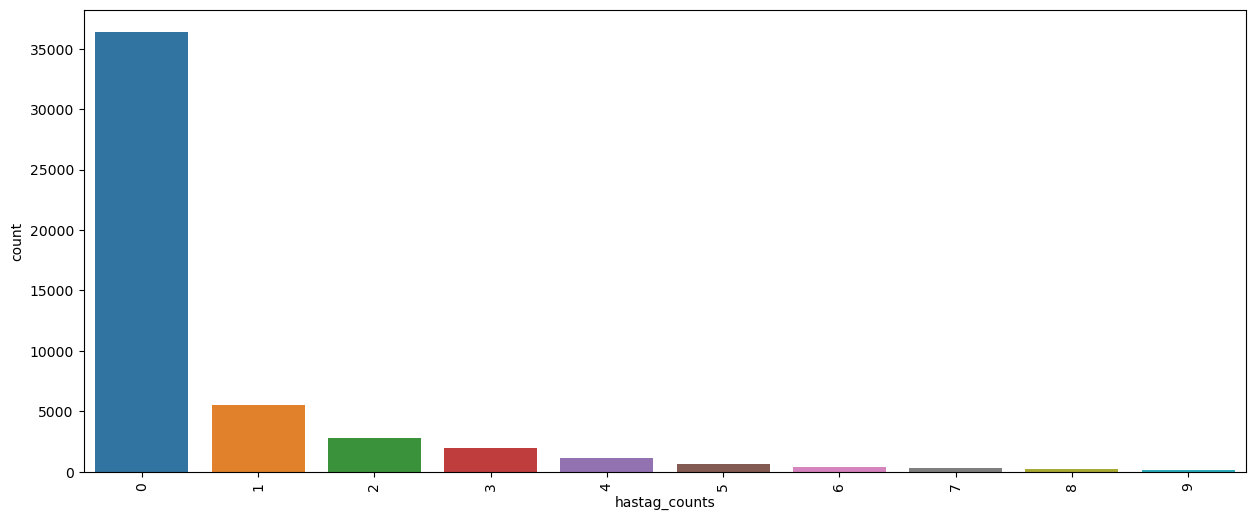

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hastag_counts', order=df["hastag_counts"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

In [69]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

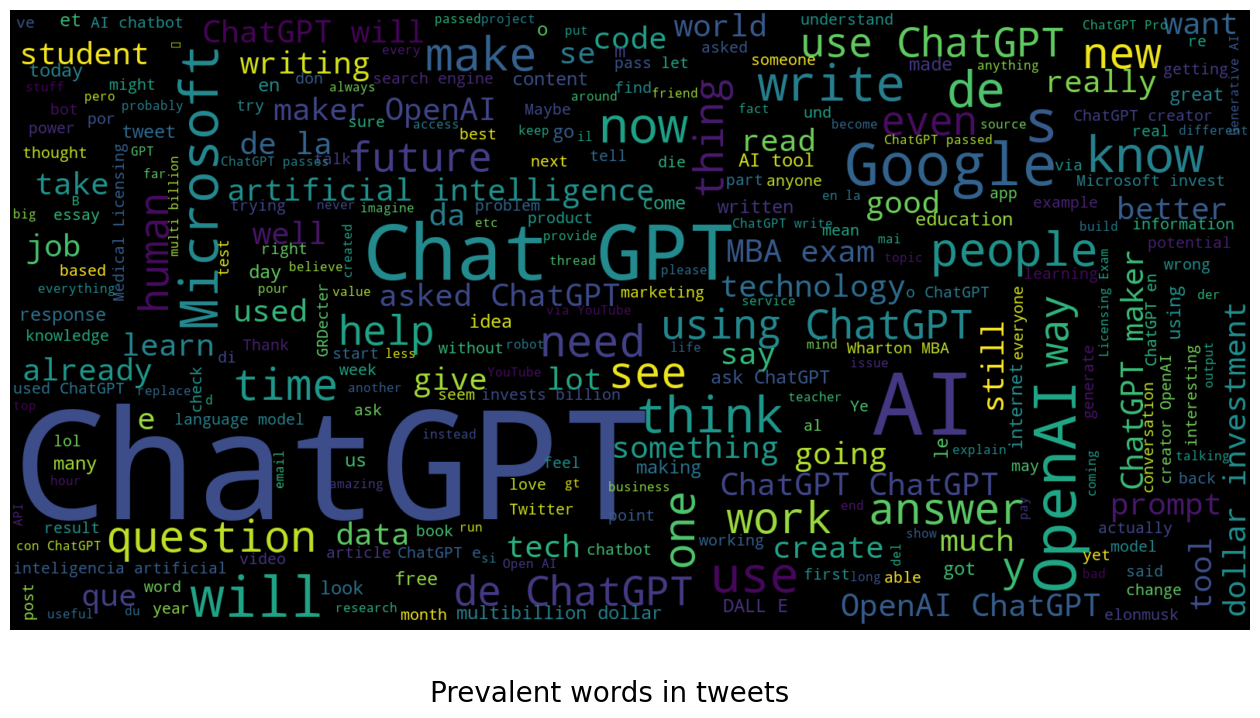

In [70]:
show_wordcloud(df['Text'], title = 'Prevalent words in tweets')

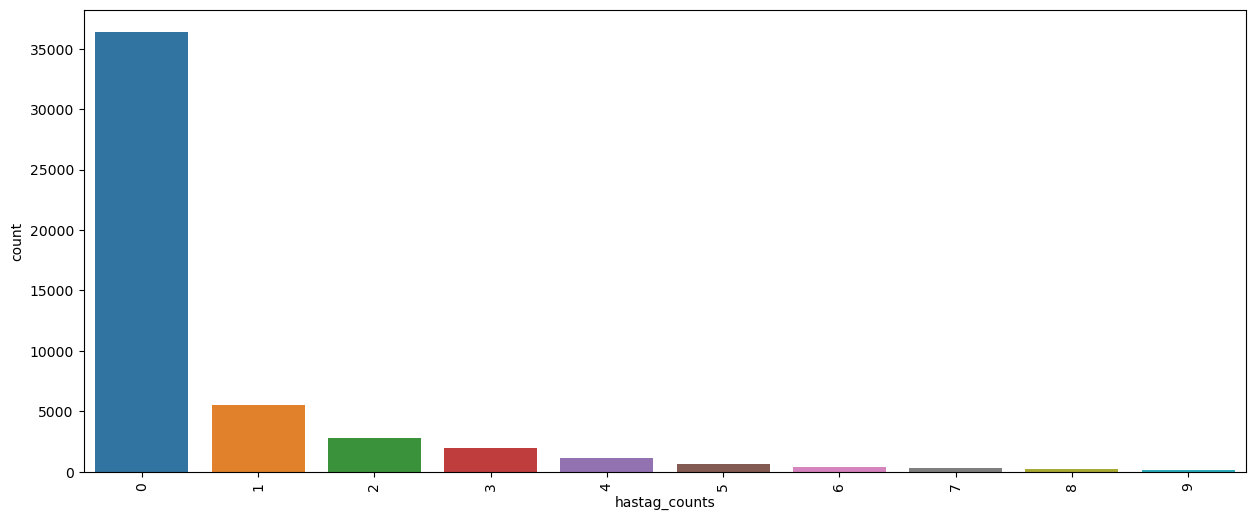

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hastag_counts', order=df["hastag_counts"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

In [79]:
sia = SentimentIntensityAnalyzer()

def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [80]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

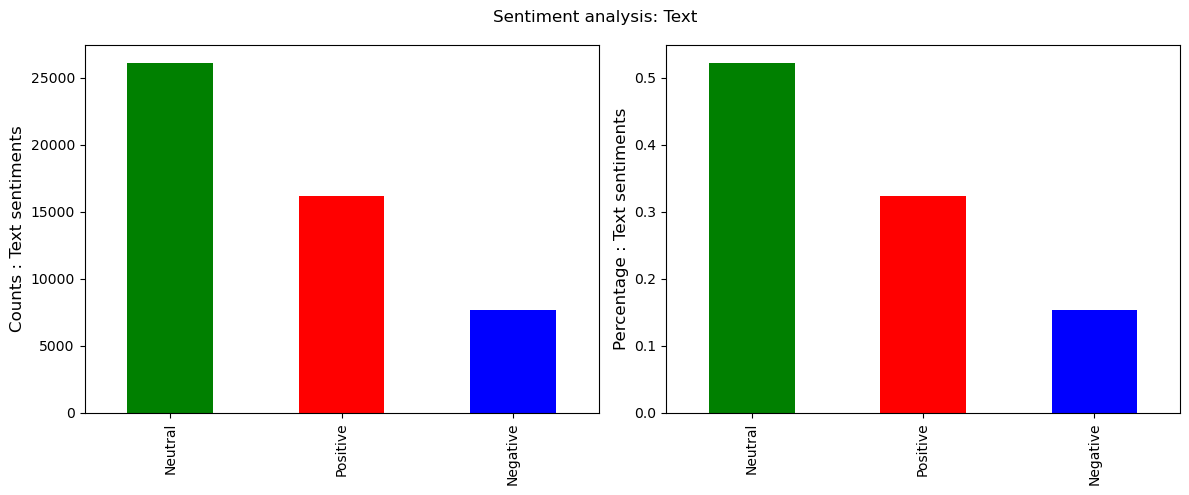

In [81]:
df['text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

Text(0.5, 1.0, 'Reaction Counts')

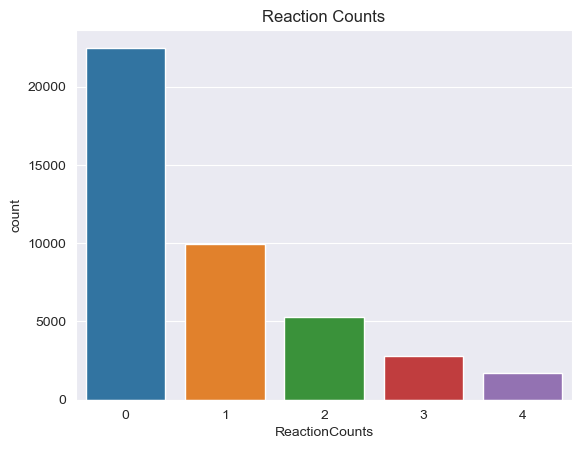

In [84]:
df['ReactionCounts'] = df['ReplyCount'] + df['RetweetCount'] + df['LikeCount'] + df['QuoteCount']
sns.countplot(data=df, x='ReactionCounts', order=df['ReactionCounts'].value_counts().index[:5])
plt.title('Reaction Counts')

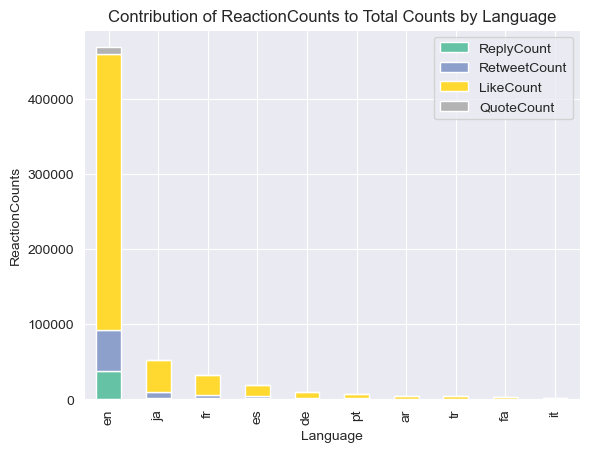

In [85]:
sns.set_style("darkgrid")
df_top10 = df.groupby('Language').sum().sort_values('ReactionCounts', ascending=False).head(10)
ax = df_top10[['ReplyCount',
               'RetweetCount',
               'LikeCount',
               'QuoteCount']].plot(kind='bar', stacked=True, colormap='Set2')
    
plt.title('Contribution of ReactionCounts to Total Counts by Language')
plt.xlabel('Language')
plt.ylabel('ReactionCounts')
plt.show()

## KEEPING 2 COLUMNS ONLY FROM DATA

In [267]:
df = df[['Text', 'Language']]
df = df.dropna()

In [268]:
X = df['Text']
y = df['Language']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [270]:
print(f'Train size: {X_train.shape}')

Train size: (40000,)


In [271]:
print(f'Test size: {X_test.shape}')

Test size: (10001,)


# CLEANING THE DATA

In [272]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [273]:
X_train_tfidf.shape

(40000, 113127)

In [274]:
X_test_tfidf.shape

(10001, 113127)

# DECISION-TREE-CLASSIFIER

In [184]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_tfidf, y_train)

In [185]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_tfidf)

In [216]:
print(f"\nCount    Language:\n{y_test[:10]}\n")


Count    Language:
27797    en
44927    ja
31536    de
42086    ja
42318    pt
7206     en
43697    es
806      ja
22230    en
47424    en
Name: Language, dtype: object



In [217]:
print(f"\nPredicted labels: {y_pred[:10]}")


Predicted labels: ['en' 'ja' 'de' 'ja' 'pt' 'en' 'es' 'ja' 'en' 'en']


In [191]:
print(f"Accuracy on test set: {round((metrics.accuracy_score(y_test, y_pred)*100),2)}%")

Accuracy on test set: 87.94%


# RANDOM FOREST

In [232]:
# Create Random Forest classifer object
rf = RandomForestClassifier()

# Train Random Forest Classifer
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [233]:
#Predict the response for test dataset
y_pred = rf.predict(X_test_tfidf)

In [234]:
print(f"\nPredicted labels: {y_pred[:10]}")


Predicted labels: ['en' 'ja' 'de' 'ja' 'pt' 'en' 'es' 'ja' 'en' 'en']


In [235]:
print(f"Accuracy on test set: {round((metrics.accuracy_score(y_test, y_pred)*100),2)}%")

Accuracy on test set: 92.53%


# KNN

In [240]:
# Create KNN classifer object with 61 languages
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=61) 

# Train KNN Classifer
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=61)

In [244]:
#Predict the response for test dataset
y_pred = knn.predict(X_test_tfidf)

In [245]:
print(f"\nPredicted labels: {y_pred[:10]}")


Predicted labels: ['en' 'en' 'de' 'en' 'pt' 'en' 'es' 'en' 'en' 'en']


In [246]:
print(f"Accuracy on test set: {round((metrics.accuracy_score(y_test, y_pred)*100),2)}%")

Accuracy on test set: 83.38%


# K-Means

In [286]:
kmeans = KMeans(3)
# kmeans.fit(tfidf.fit_transform(X_train))
# UNKNOWN ERROR